# Ames Housing Price Prediction - Part 2

## 10.0 Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|ms_zoning|object|train & test|General zoning classification of the sale| 
|lot_frontage|float| train & test | Linear feet of street connected to property|
|street|object| train & test | type of road access to property|
|land_contour|object| train & test | Flatness of property|
|overall_qual|int| train & test | Rates the overall material and finish of the house (Rating from 1-10)|
|roof_matl|object| train & test | Roof material|
|exterior_1st|object| train & test | Exterior covering on house|
|mas_vnr_type|object| train & test | Masonry veneer type|
|mas_vnr_area|float| train & test | Masonry veneer area|
|foundation|object| train & test | Type of foundation of the house|
|bsmt_qual|int| train & test | Basement height (Rating from 0 - 6)|
|bsmt_exposure|int| train & test | Walkout or garden level walls (Rating from 0-4)|
|bsmtfin_sf_1|float| train & test | Type 1 finished in square feet|
|heating|object| train & test | Type of heating in the house|
|heating_qc|int| train & test | Heating quality or condition|
|central_air|object| train & test | Central air condition (Y or N)|
|gr_liv_area|int| train & test | Above ground living area square feet|
|full_bath|int| train & test | Full bathrooms above ground|
|fireplace_qu|int| train & test | Fireplace quality (Rating from 0-5)|
|garage_type|object| train & test | Garage location|
|garage_finish|int| train & test | Interior finish of the garage (Rating from 0-3))|
|garage_area|float| train & test | Size of garage in square feet|
|wood_deck_sf|int| train & test | Wood deck area in square feet|
|open_porch_sf|int| train & test | Open porch area in square feet|
|sale_type|object| train & test | Type of sale|
|saleprice|int| train & test | Sale price in $|
|age_built|int| train & test | Age of the house since it was built|
|age_remod|int| train & test | Age of the house since it was modified|
|total_sf|float| train & test | Total square feet of the house|
|open_lot|bool| train & test | Location of the house with 3 side frontage|
|common_lot|bool| train & test | Location of the house with 2 side frontage |
|closed_lot|bool| train & test | Location of the house in cul de sac|
|near_park|bool| train & test | Proximity of house near and adjacent to off-site features |
|near_road|bool| train & test | Proximity of house near and adjacent to feeder and arterial street | 

## 11.0 Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression , Ridge, RidgeCV, Lasso, LassoCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',100)

In [2]:
#import cleaned dataset and final tetsing dataset
train = pd.read_csv('../cleaned_data/train_clean.csv',na_values='',keep_default_na=False)
hold_out = pd.read_csv('../datasets/test.csv',na_values='',keep_default_na=False)

## 12.0 Preprocessing

In [3]:
#splitting X, y with saleprice as target
X = train.drop(columns='saleprice')
y = train.saleprice

In [4]:
#check y 
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: saleprice, dtype: int64

In [5]:
X.columns

Index(['ms_zoning', 'lot_frontage', 'street', 'land_contour', 'overall_qual',
       'roof_matl', 'exterior_1st', 'mas_vnr_type', 'mas_vnr_area',
       'foundation', 'bsmt_qual', 'bsmt_exposure', 'bsmtfin_sf_1', 'heating',
       'heating_qc', 'central_air', 'gr_liv_area', 'full_bath', 'fireplace_qu',
       'garage_type', 'garage_finish', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'sale_type', 'age_built', 'age_remod', 'total_sf',
       'open_lot', 'common_lot', 'closed_lot', 'near_park', 'near_road'],
      dtype='object')

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ms_zoning      2042 non-null   object 
 1   lot_frontage   2042 non-null   float64
 2   street         2042 non-null   object 
 3   land_contour   2042 non-null   object 
 4   overall_qual   2042 non-null   int64  
 5   roof_matl      2042 non-null   object 
 6   exterior_1st   2042 non-null   object 
 7   mas_vnr_type   2042 non-null   object 
 8   mas_vnr_area   2042 non-null   float64
 9   foundation     2042 non-null   object 
 10  bsmt_qual      2042 non-null   int64  
 11  bsmt_exposure  2042 non-null   int64  
 12  bsmtfin_sf_1   2042 non-null   float64
 13  heating        2042 non-null   object 
 14  heating_qc     2042 non-null   int64  
 15  central_air    2042 non-null   object 
 16  gr_liv_area    2042 non-null   int64  
 17  full_bath      2042 non-null   int64  
 18  fireplac

In [7]:
#function to change to one-hot encode categorical object
cat_df = X.select_dtypes(exclude=['number','bool'])

def one_hot(dataframe):
    for i in dataframe:
        dataframe = pd.get_dummies(dataframe, drop_first=True)
        return dataframe

In [8]:
X = pd.concat([X,one_hot(cat_df)],axis=1)

In [9]:
X = X.drop(columns=cat_df)

In [10]:
len(X.columns)

74

### 12.1 RFE CV

In [11]:
#RFECV
lr = LinearRegression()
select = RFECV(lr,cv=5, scoring='r2')
ss = StandardScaler()

X_RFE = ss.fit_transform(X)
select.fit(X_RFE, y)

RFECV(cv=5, estimator=LinearRegression(), scoring='r2')

In [12]:
select.n_features_

41

In [13]:
top_feat = X.columns[select.support_]

In [14]:
top_feat

Index(['lot_frontage', 'overall_qual', 'mas_vnr_area', 'bsmt_qual',
       'bsmt_exposure', 'bsmtfin_sf_1', 'heating_qc', 'gr_liv_area',
       'full_bath', 'fireplace_qu', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'age_built', 'age_remod', 'total_sf', 'open_lot',
       'common_lot', 'closed_lot', 'near_park', 'ms_zoning_RL', 'ms_zoning_RM',
       'land_contour_HLS', 'roof_matl_WdShngl', 'exterior_1st_BrkFace',
       'exterior_1st_CemntBd', 'exterior_1st_HdBoard', 'exterior_1st_Plywood',
       'exterior_1st_VinylSd', 'exterior_1st_Wd Sdng', 'mas_vnr_type_BrkFace',
       'mas_vnr_type_None', 'mas_vnr_type_Stone', 'foundation_CBlock',
       'foundation_Slab', 'heating_OthW', 'garage_type_Attchd',
       'garage_type_BuiltIn', 'garage_type_Detchd', 'garage_type_NA',
       'sale_type_New'],
      dtype='object')

## 13.0 Modelling 

### 13.1 Linear Regression 

In [15]:
#split train test to 80: 20 
X_train, X_test, y_train, y_test = train_test_split(X[top_feat], y, test_size=0.2, random_state=42)

In [16]:
#standardised

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [17]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (1633, 41)
y_train shape is: (1633,)
Z_test shape is: (409, 41)
y_test shape is: (409,)


In [18]:
lr.fit(Z_train, y_train)
lr.score(Z_train, y_train)

0.8961879956252532

In [19]:
lr.score(Z_test, y_test)

0.869512942135362

In [20]:
cross_val_score(estimator=lr, X=Z_train, y=y_train, cv=5, scoring='r2').mean()

0.8879180438395444

In [26]:
y_pred=lr.predict(Z_test)
train_pred=lr.predict(Z_train)

In [30]:
print(" LR ".center(18, "="))
print(f'LR Train Score: {lr.score(Z_train, y_train)}')
print(f'LR Test Score: {lr.score(Z_test, y_test)}')
print(f'LR Train RMSE: {np.sqrt(mean_squared_error(y_train, train_pred))}')
print(f'LR Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

======= LR =======
LR Train Score: 0.8961879956252532
LR Test Score: 0.869512942135362
LR Train RMSE: 25793.54393915855
LR Test RMSE: 27497.171676342376


### 13.2 Ridge Regression

In [31]:
ridge = Ridge(alpha=1)
ridge.fit(Z_train, y_train)

rid_cv = RidgeCV(alphas=np.logspace(0,5,100), cv=5, scoring = 'r2')
rid_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [32]:
ridg_pred=rid_cv.predict(Z_test)

In [33]:
print(" Ridge ".center(19, "="))
print(f'Ridge Train Score: {ridge.score(Z_train, y_train)}')
print(f'Ridge Test Score: {ridge.score(Z_test, y_test)}')

print(f'RidgeCV Train Score: {rid_cv.score(Z_train, y_train)}')
print(f'RidgeCV Test Score: {rid_cv.score(Z_test, y_test)}')
print(f'RidgeCV Optimal Alpha: {rid_cv.alpha_}')

print(f'RidgeCV Train RMSE: {np.sqrt(mean_squared_error(y_train, rid_cv.predict(Z_train)))}')
print(f'RidgeCV Test RMSE: {np.sqrt(mean_squared_error(y_test, ridg_pred))}')

====== Ridge ======
Ridge Train Score: 0.8961866858120134
Ridge Test Score: 0.8695807334426362
RidgeCV Train Score: 0.8960426085803818
RidgeCV Test Score: 0.8701694666925435
RidgeCV Optimal Alpha: 16.297508346206442
RidgeCV Train RMSE: 25811.59934181189
RidgeCV Test RMSE: 27427.910658414876


### 13.3 Lasso Regression 

In [34]:
lasso = LassoCV(alphas=np.logspace(-2,0,100), cv=5, max_iter=10e8)
lasso.fit(Z_train, y_train)

LassoCV(alphas=array([0.01      , 0.01047616, 0.01097499, 0.01149757, 0.01204504,
       0.01261857, 0.01321941, 0.01384886, 0.01450829, 0.01519911,
       0.01592283, 0.01668101, 0.01747528, 0.01830738, 0.0191791 ,
       0.02009233, 0.02104904, 0.02205131, 0.0231013 , 0.02420128,
       0.02535364, 0.02656088, 0.02782559, 0.02915053, 0.03053856,
       0.03199267, 0.03351603, 0.03511192, 0.0367838 , 0.03853529,
       0.04037...
       0.20565123, 0.21544347, 0.22570197, 0.23644894, 0.24770764,
       0.25950242, 0.27185882, 0.28480359, 0.29836472, 0.31257158,
       0.32745492, 0.34304693, 0.35938137, 0.37649358, 0.39442061,
       0.41320124, 0.43287613, 0.45348785, 0.47508102, 0.49770236,
       0.52140083, 0.54622772, 0.57223677, 0.59948425, 0.62802914,
       0.65793322, 0.68926121, 0.7220809 , 0.75646333, 0.7924829 ,
       0.83021757, 0.869749  , 0.91116276, 0.95454846, 1.        ]),
        cv=5, max_iter=1000000000.0)

In [35]:
lasso_pred=lasso.predict(Z_test)

In [36]:
print(" Lasso ".center(19, "="))
print(f'LassoCV Train Score: {lasso.score(Z_train, y_train)}')
print(f'LassoCV Test Score: {lasso.score(Z_test, y_test)}')
print(f'LassoCV Optimal Alpha: {lasso.alpha_}')

print(f'LassoCV Train RMSE: {np.sqrt(mean_squared_error(y_train, lasso.predict(Z_train)))}')
print(f'LassoCV Test RMSE: {np.sqrt(mean_squared_error(y_test, lasso_pred))}')

====== Lasso ======
LassoCV Train Score: 0.8961879416755527
LassoCV Test Score: 0.8695293453429851
LassoCV Optimal Alpha: 1.0
LassoCV Train RMSE: 25793.550641436355
LassoCV Test RMSE: 27495.44332105884


In [142]:
pd.Series(lasso.coef_.astype(int), top_feat).sort_values()

age_remod               -6277
low_neigh               -5014
mid_neigh               -4613
bldg_type_TwnhsE        -4061
bldg_type_Twnhs         -2829
bldg_type_Duplex        -2750
common_lot              -2749
bldg_type_2fmCon        -2485
closed_lot                  0
garage_type_BuiltIn      3178
house_style_2Story       3281
lot_frontage             3325
exterior_1st_CemntBd     3403
exterior_1st_BrkFace     3541
heating_qc               3757
high_neigh               3932
fireplace_qu             4156
roof_matl_WdShngl        4639
bsmt_exposure            4765
foundation_Slab          4991
sale_type_New            5199
garage_area              5300
mas_vnr_type_BrkFace     7578
mas_vnr_type_Stone       7830
mas_vnr_area             9702
bsmtfin_sf_1            10712
mas_vnr_type_None       14319
overall_qual            18034
total_sf                29049
dtype: int64

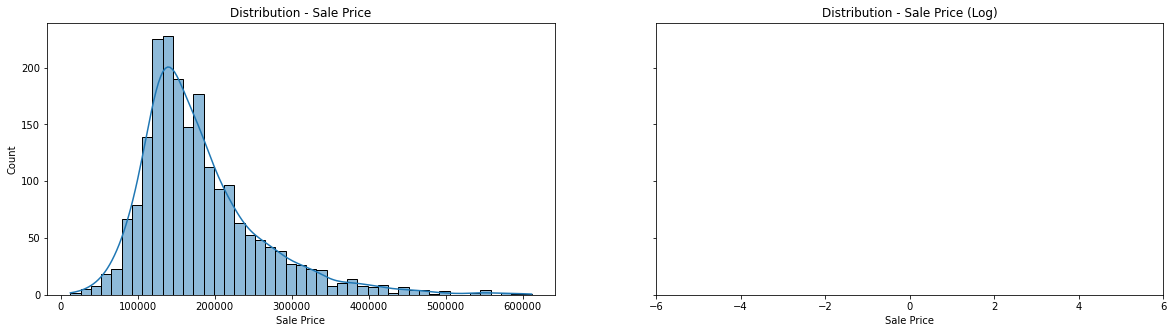

In [187]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5), sharey=True)

ax = ax.flatten()
sns.histplot(data=y, kde=True, ax=ax[0]);
ax[0].set_title('Distribution - Sale Price')
ax[0].set_xlabel('Sale Price')
ax[0].set_ylabel('Count')


norm_price = np.log(y)
sns.histplot(data=train, x=norm_price, kde=True, ax=ax[1]);
ax[1].set_title('Distribution - Sale Price (Log)')
ax[1].set_xlabel('Sale Price')
ax[1].set_xlim(-6,6)
plt.show()

## Evaluation of Analysis

## Conclusion and Recommendation

In [37]:
#Calculate residual
residual = lr.predict(Z_train) - y_train

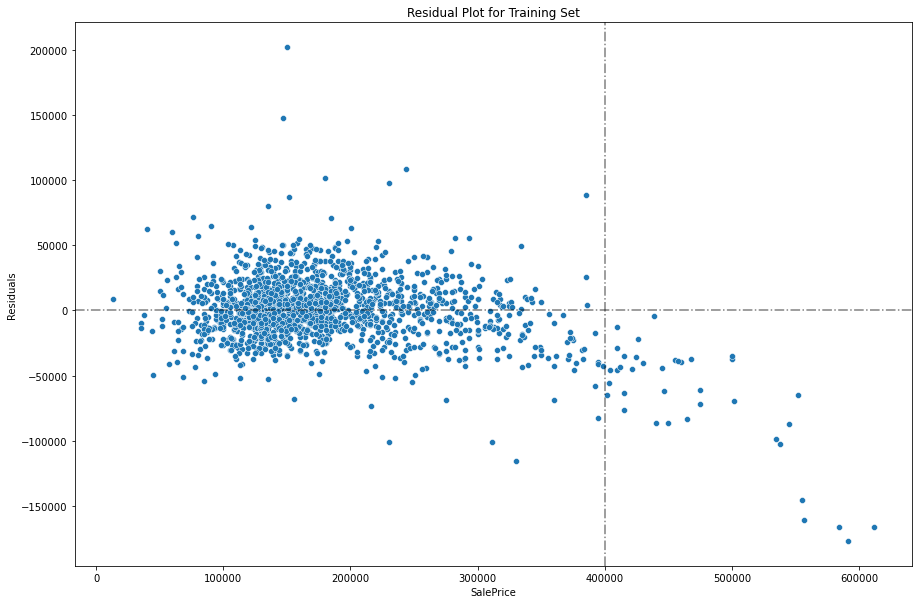

In [38]:
plt.figure(figsize=(15,10))

sns.scatterplot(y=residual, x=y_train)
plt.title('Residual Plot for Training Set')
plt.xlabel('SalePrice')
plt.ylabel('Residuals')
plt.axhline(0, ls= '-.',color='k',alpha = 0.5)
plt.axvline(400000, ls= '-.',color='k',alpha = 0.5)